
# **Employee Attrition Prediction in Large Organizations**


 - Pavan Thalla


## Introduction

This dataset, obtained from [IBM HR Analytics Employee Attrition on Kaggle (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset),  is a synthetic dataset that represents employee information in large organizations. It is structured with nearly 2000 rows and 35 columns, each representing different attributes related to employees.
    
    



## Project Goal :

Can we predict employee attrition using data on employee demographics like  job roles, performance, and satisfaction and yearsOfWorking ?

Yes, the primary objective of this project is to predict attrition, or the likelihood that an employee
would leave, using the variables in the dataset.
## Defining Analysis:

With the use of this data, we might be able
to identify patterns that contribute to employee turnover and eventually create a model
that would assist HR departments in proactively managing attrition.

We will use different **metrics** like Precision : To measure how many of the predicted results are actual leavers and Recall : To make sure actual leavers are identified and F1 score and ROC-AUC curve : To evaluate the model's ability to distinguish between leavers and non-leavers across various thresholds


**Application of this Analysis:**

The information
gathered from this study can be applied for organizational employee growth and assist in developing effective retention plans.From a business perspective, predicting attrition can help HR departments proactively address retention issues, reduce recruitment costs, and improve employee satisfaction.
From an academic or theoretical perspective, it could involve identifying key factors contributing to attrition and modeling complex employee behavior.

# **Loading Data**

In [ ]:

    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc


    # Load the dataset
    data = pd.read_csv('original_data.csv')
    data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



#Exploratory Data Analysis (EDA)

We will visualize the data to understand the distribution of various fields and explore the relationships between different variables. We checked for missing values, and analyzing variable distributions with histograms and bar charts. Correlations between features were studied using a heatmap to identify relationships and multicollinearity. These steps helped us to prepare the data for modeling.

# Data Cleaning and Preprocessing
Here we handle missing values, check data types, and prepare data for analysis.
    

In [ ]:

# Checking for missing values
data.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


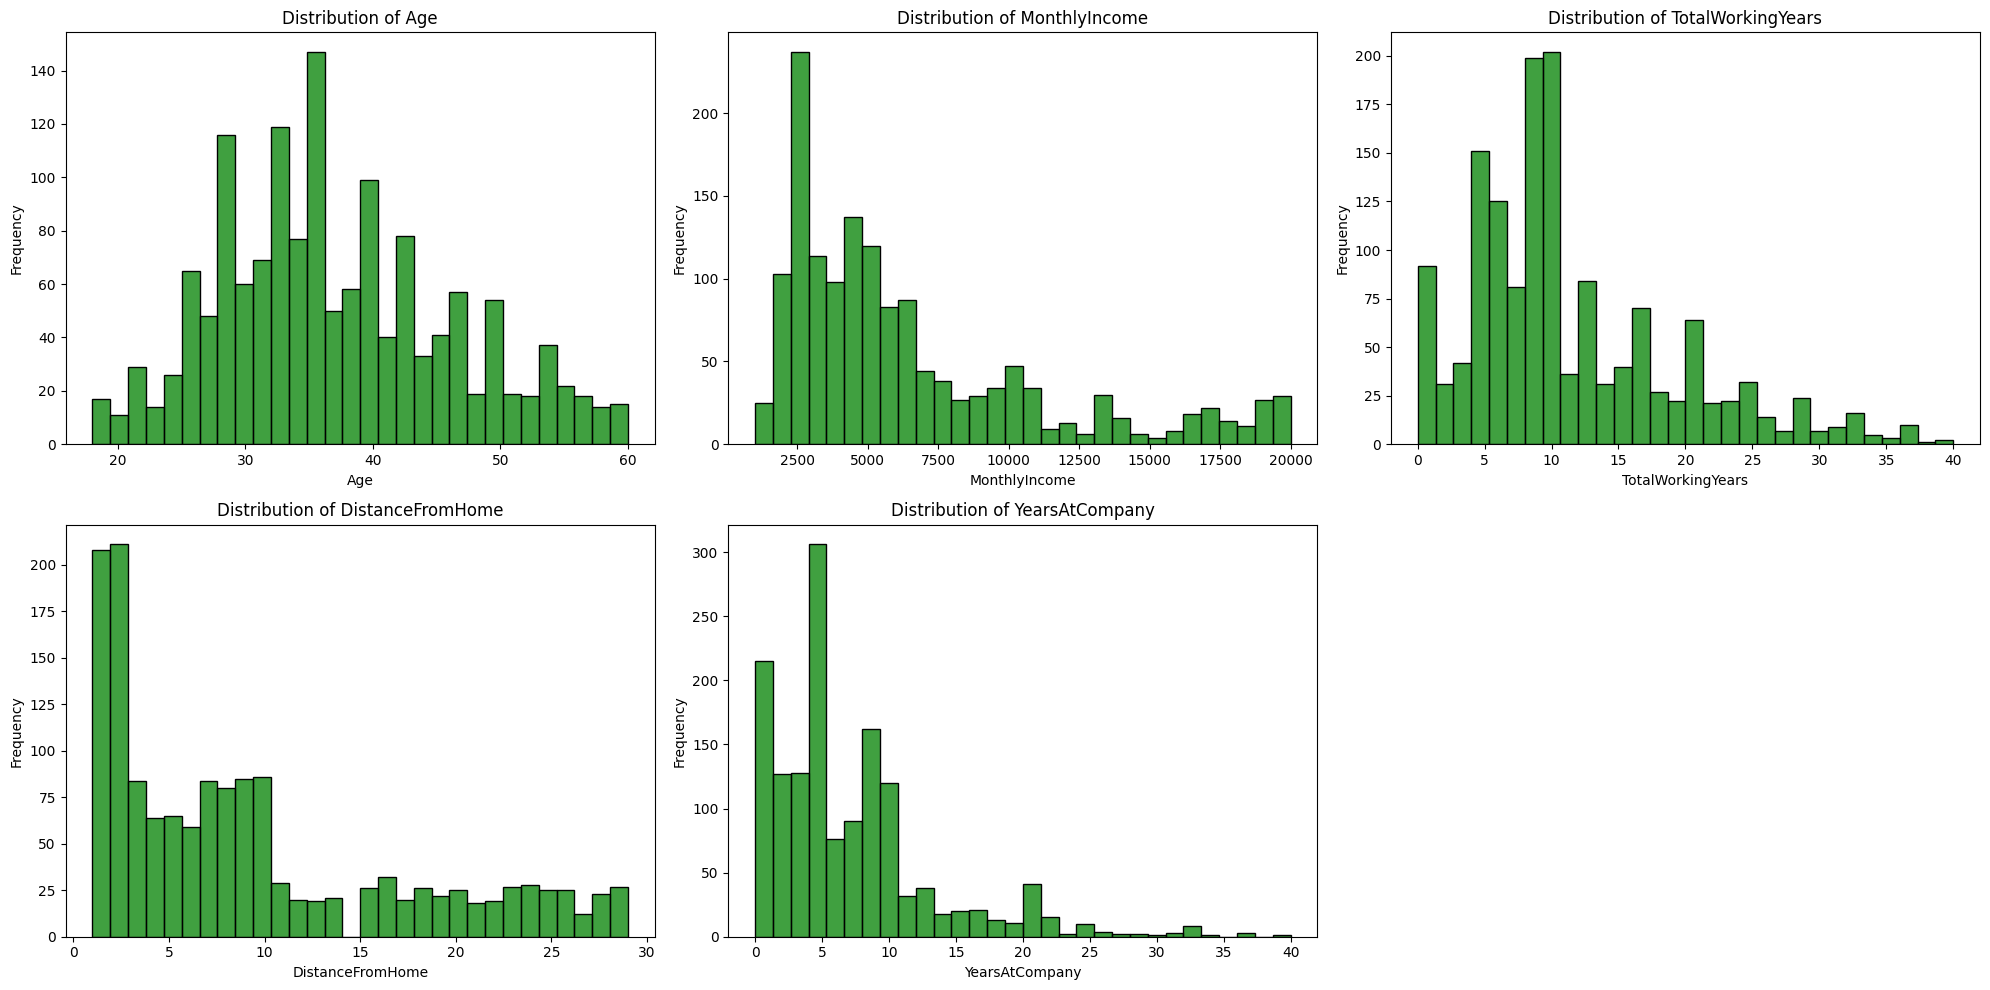

In [ ]:
# Selecting features most correlated with Attrition
important_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome', 'YearsAtCompany']

# Plotting histograms for selected features
plt.figure(figsize=(20, 10))
for i, col in enumerate(important_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=data, x=col, kde=False, bins=30, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The histograms show important patterns in employee attrition. Younger employees, those with less work experience, or shorter time at the company are more likely to leave, making it harder to retain early-career workers. Employees with lower salaries or longer commutes are also more likely to quit, possibly due to financial stress or commuting difficulties. These insights can help identify employees at risk of leaving and create strategies to keep them.

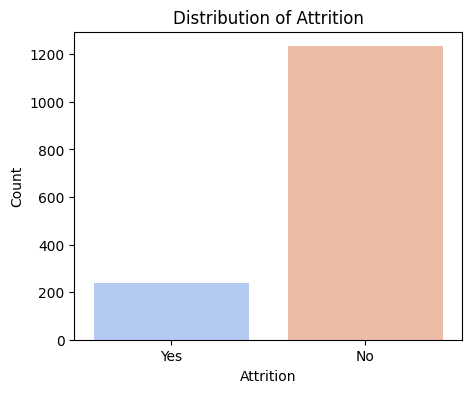

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Check the distribution of the Attrition variable
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Attrition', palette='coolwarm',hue='Attrition',legend=False)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()



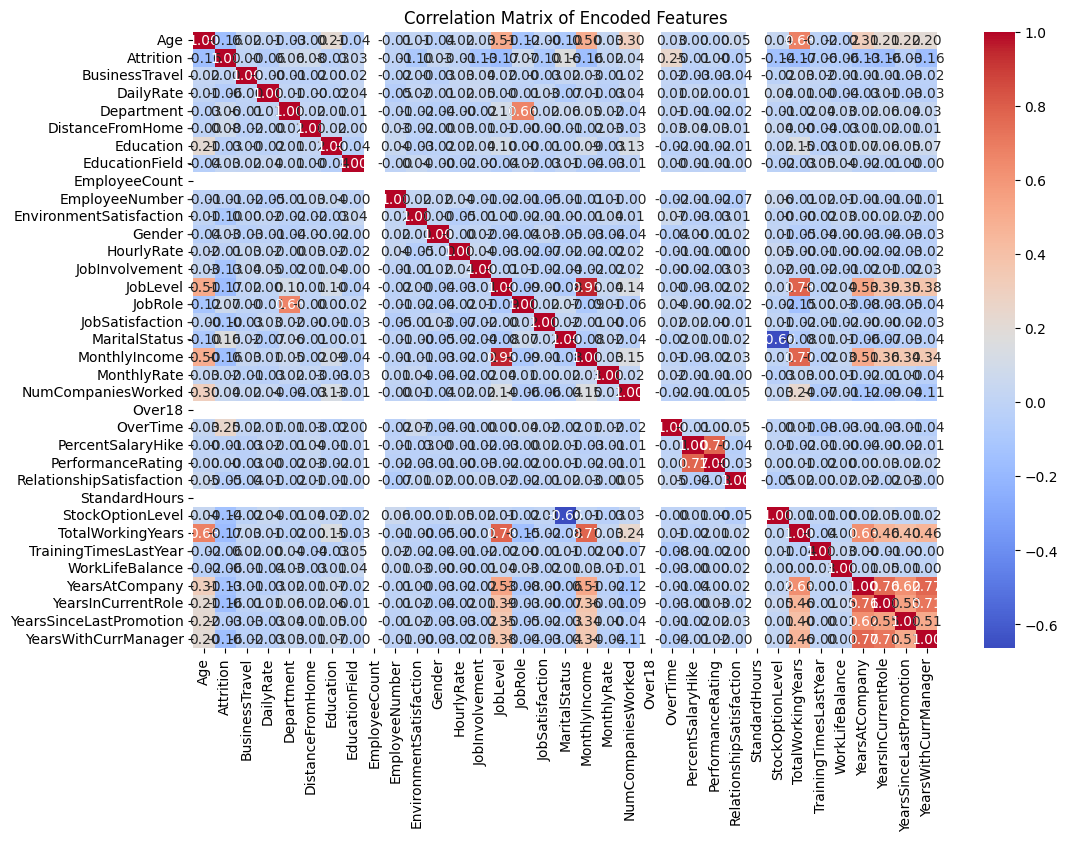


Top Features Correlated with Attrition:
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.1561

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
data_encoded = data.copy()
label_encoders = {}

# Encoding all object-type columns (categorical)
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Compute the correlation matrix for the encoded data
correlation_matrix = data_encoded.corr()

# Extract and sort correlations with Attrition
attrition_correlations = correlation_matrix['Attrition'].sort_values(ascending=False)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Encoded Features')
plt.show()

# Display the top correlations with Attrition
print("\nTop Features Correlated with Attrition:")
print(attrition_correlations.drop('Attrition'))

Age, Monthly Income, Total Working Years, Distance From Home, and Years at Company all have a very weak negative correlation with attrition. This means these factors don't strongly impact whether employees leave, though slightly older, higher-earning, experienced, or long-tenured employees are a bit less likely to leave.No single feature strongly predicts attrition. Decisions to leave likely depend on a mix of factors working together.

In [ ]:
# Fill missing values (if any)
data = data.fillna(method='ffill')

# Manually encoding binary variables like 'OverTime' that contain 'Yes' or 'No'
if 'OverTime' in data.columns:
    data['OverTime'] = data['OverTime'].map({'No': 0, 'Yes': 1})

# Encode the target variable 'Attrition' if it's not already numeric
if data['Attrition'].dtype == 'object':
    data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

# Apply one-hot encoding to categorical variables (check existence first)
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
categorical_columns = [col for col in categorical_columns if col in data.columns]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Drop constant or irrelevant columns
irrelevant_columns = ['Over18', 'EmployeeCount', 'StandardHours']  # Example irrelevant columns
data = data.drop(columns=[col for col in irrelevant_columns if col in data.columns], errors='ignore')

<ipython-input-35-c258585781a6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


# **Model Training**

We used Random Forest because it works well with tabular data and can capture complex relationships between features. With proper tuning, it is robust to overfitting. To handle class imbalance, we used SMOTE, which improved the model's ability to predict employees likely to leave.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separating the feature and target variable
y = data['Attrition']
X = data.drop('Attrition', axis=1)

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])



# Calculating MSE
y_pred_proba = model.predict_proba(X_test)[:, 1]
mse = mean_squared_error(y_test, y_pred_proba)

# Print out results
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Mean Squared Error (MSE):", mse)

Accuracy: 0.9351351351351351
ROC AUC: 0.9748318103127123
Mean Squared Error (MSE): 0.07834851351351352


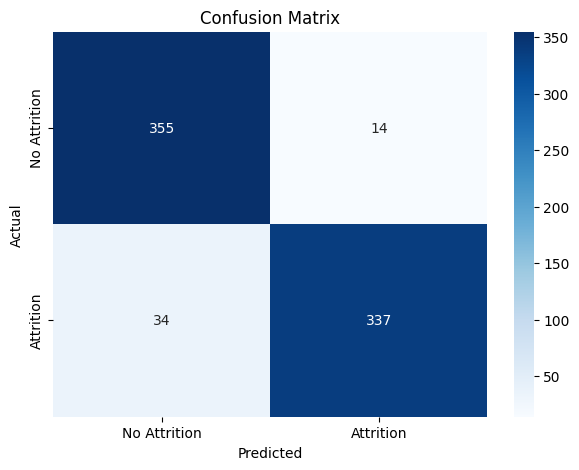

In [ ]:
# Confusion Matrix Visualization
cf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(7, 5))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

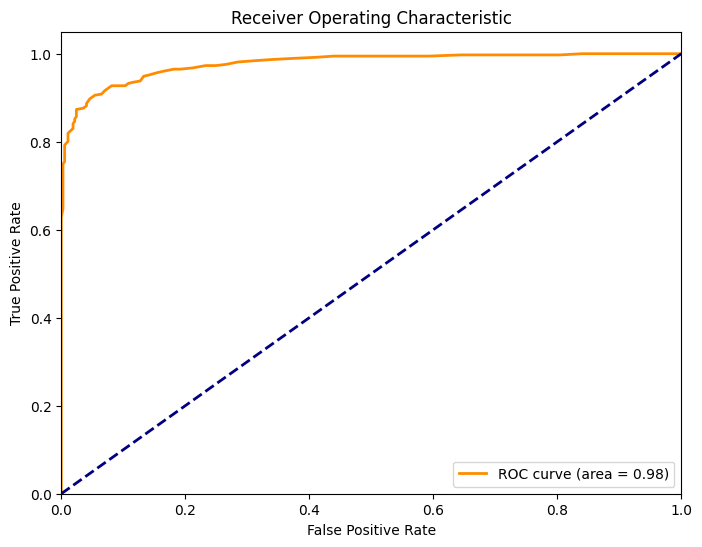

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predictions, target_names=['No Attrition', 'Attrition'])
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

No Attrition       0.90      0.95      0.93       369
   Attrition       0.95      0.90      0.92       371

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



The Random Forest model performed very well, achieving high accuracy and ROC AUC. It also maintained a good balance between precision and recall for predicting attrition, making it effective in identifying employees at risk of leaving.

### Conclusion

1. **Model Performance**:

   - The model predicts employee attrition with nearly 93% accuracy.
   - The ROC AUC score shows that the model is very good at distinguishing between employees who stay and leave.
   - The Mean Squared Error (MSE) reflects that the predicted probabilities closely match the true labels.

2. **Confusion Matrix**:
   - True Positives (TP): 337 employees are identified as leaving the company.
   <br>
True Negatives (TN): 355 employees are identified as staying.
<br>
False Positives (FP): 14 Few employees are incorrectly predicted to leave.
<br>
False Negatives (FN): 34 A relatively small number of employees who leave are misclassified as staying.

3.**Classification Report**

  - Precision (Attrition: 0.95): Indicates the model has a high accuracy for predicting employees who leave.

  - Recall (Attrition: 0.90): Shows the model captures most of the employees who leave, although there is room for improvement.

  - F1-Score (Attrition: 0.92): A balanced metric indicating good overall performance for predicting attrition.


---
**Further Improvements**

- Even after using SMOTE, experimenting with other techniques like class-weight adjustment in models or cost-sensitive learning might help prioritize "Attrition" predictions.
Feature Engineering:

- Combine existing features like satisfaction + income , to
focus on features with moderate correlation with attrition, like overtime, job role, and marital status, and explore new ones.

- Use Model Tuning:
Optimize hyperparameters using grid search or random search to improve recall for the "Attrition" class.
We can use with other algorithms like  Neural Networks for better performance.

 To reduce attrition, companies should focus on engaging employees through recognition, feedback, and a positive culture. Offer competitive pay, growth opportunities, and flexible work options to improve satisfaction and work-life balance. Build supportive relationships, train managers, and foster inclusion. Use data insights to identify risks and tailor retention strategies. The goal is to create an environment where employees feel valued and motivated to stay.